In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [2]:
input_data = pd.read_csv("./data/dataframe_.csv")

In [3]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
input_data.sample(5)

,input,output
1506,77.107528,-9.061202
710,-48.307722,-55.947190
1424,86.274009,34.439973
916,3.633331,-95.000000
867,-134.407988,-125.921497


## Data Cleaning

### Check for missing values

In [5]:
input_data.isnull().sum()

input     1
output    1
dtype: int64

In [6]:
input_data = input_data.dropna()

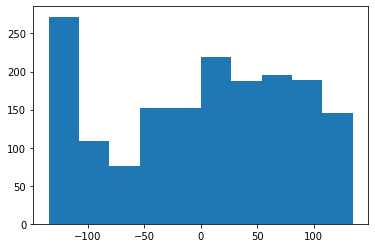

In [7]:
plt.hist(input_data["input"])
plt.show()

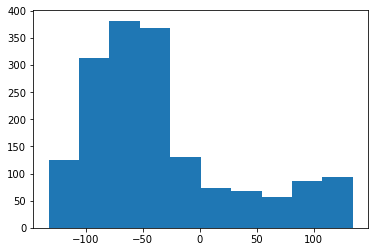

In [8]:
plt.hist(input_data["output"])
plt.show()

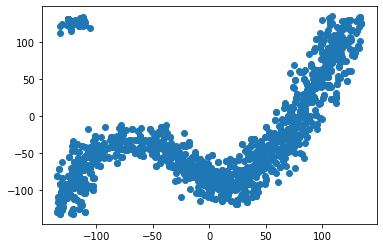

In [9]:
plt.scatter(input_data["input"], input_data["output"])
plt.show()

### Outlier removal

In [10]:
outliers = (input_data["input"] < -100) & (input_data["output"] > 100)
cleaned_data = input_data.loc[~outliers]

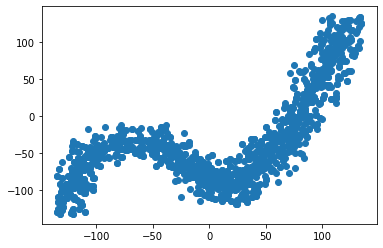

In [11]:
plt.scatter(cleaned_data["input"], cleaned_data["output"])
plt.show()

## Train-Test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = cleaned_data.drop("output", axis=1)
y = cleaned_data["output"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=144)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1242, 1)
Test size: (415, 1)


## Modeling

### Linear model

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
from sklearn import metrics

In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = linear_model.predict(X_test)

In [19]:
metrics.mean_absolute_error(y_test, y_pred)

38.5755896113538

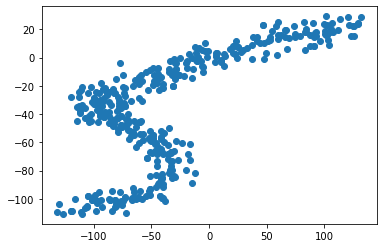

In [20]:
plt.scatter(y_test, y_pred)
plt.show()

### SVM

In [21]:
from sklearn.svm import SVR

In [22]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [23]:
y_pred = svm_model.predict(X_test)

In [24]:
metrics.mean_absolute_error(y_test, y_pred)

18.55091583080425

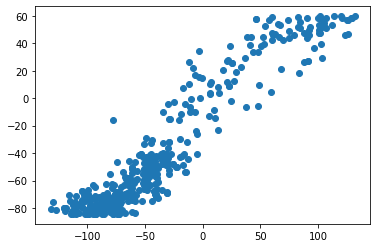

In [25]:
plt.scatter(y_test, y_pred)
plt.show()

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [28]:
y_pred = dt_model.predict(X_test)

In [29]:
metrics.mean_absolute_error(y_test, y_pred)

10.14825807855651

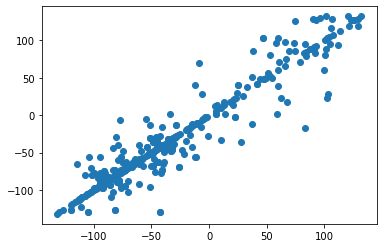

In [30]:
plt.scatter(y_test, y_pred)
plt.show()

**Observations:**
- The lowest mean absolute error is observed for decision tree algorithm.